# Regression: Car price Prediction
***

__[Student Name :: Ankit Bhatia](https://www.linkedin.com/in/ab9bhatia/)__

### <u>Table of Contents</u>


[I. Prerequisite](#prerequisite)

[II. Import Libraries and set required parameters](#library)

[III. Data Sourcing](#sourcing)

[IV. Data Preprocessing](#preprocessing)

[V. Exploratory Data Analysis](#eda)

[VI. Convert Categorical Variables to Continuos](#cat)

[VII. Feature Scaling](#scaling)

[VIII. Feature Selection](#feature)

[IX. UDF's for Model](#model_prep)

[X. Model Building](#model)

[XI. Model Summary](#model_summary)

[XII. Model Prediction](#prediction)

[XIII. Conclusion](#conclusion)

<a id='prerequisite'></a>

## I. Prerequisite

1. Place 'CarPrice_Assignment.csv' input file at your current working directory before running this code.

2. Please make sure that you have following python libraries imported/installed at your system:

    * numpy version	        : 1.12.1 or higher
    * pandas version	    : 0.20.3 or higher
    * seaborn version	    : 0.8.0 or higher
    * statsmodels version	: 0.8.0 or higher
    * sklearn version	    : 0.19.1 or higher

<a id='library'></a>

## II. Import Libraries and set required parameters

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

# rmse and r-square
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.3f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

# statsmodel
import statsmodels.api as sm

<a id='sourcing'></a>

## III. Data Sourcing

In [74]:
car = pd.read_csv('CarPrice_Assignment.csv')
print('Rows & Columns ::',car.shape)
car.head()

Rows & Columns :: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


<a id='preprocessing'></a>

## IV. Data Preprocessing

#### 1. Null & Duplicate value checks

In [75]:
# check if there are any null values
print('No of Null Values: ',car.isnull().sum().sum())

# check if there are any duplicate rows
print('No of duplicate rows: ',car.duplicated().sum())
# There are no null values & no duplicate rows in the dataset.

No of Null Values:  0
No of duplicate rows:  0


#### 2. Split column values

In [76]:
# As per the problem statement variable name 'CarName'  comprised of two parts:
# first word is the name of 'car company' and the second is the 'car model'.
car['company'],car['model'] = car['CarName'].str.split(' ', 1).str

In [77]:
car[['CarName','company']].head(4)

,CarName,company
0,alfa-romero giulia,alfa-romero
1,alfa-romero stelvio,alfa-romero
2,alfa-romero Quadrifoglio,alfa-romero
3,audi 100 ls,audi


In [78]:
# drop CarName column now
car.drop(labels=['CarName','model'],axis=1, inplace=True)

#### 3. Data Quality Issues

In [79]:
# data cleaning in company column
car.company.unique()
# mazda is mis-spelled as maxda
# toyota is mis-spelled as toyouta
# porsche is mis-spelled as porcshce
# volkswagen is mis-spelled as vokswagen
# volkswagen in short form written as vw
# Nissan & nissan considered as two differnt company
# 'alfa-romeo' is mis-spelled as 'alfa-romero'

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [80]:
# Correct the spelling mistakes
car['company'] = car['company'].str.lower()
car['company'] = car.loc[:, 'company'].replace(['maxda', 'toyouta', 'porcshce','vokswagen','vw','alfa-romero'], \
                              ['mazda', 'toyota', 'porsche','volkswagen','volkswagen','alfa-romeo'])

In [81]:
car.company.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

<a id='eda'></a>

## V. Exploratory Data Analysis

### Univariate Analysis

#### 1. Car price Distribution

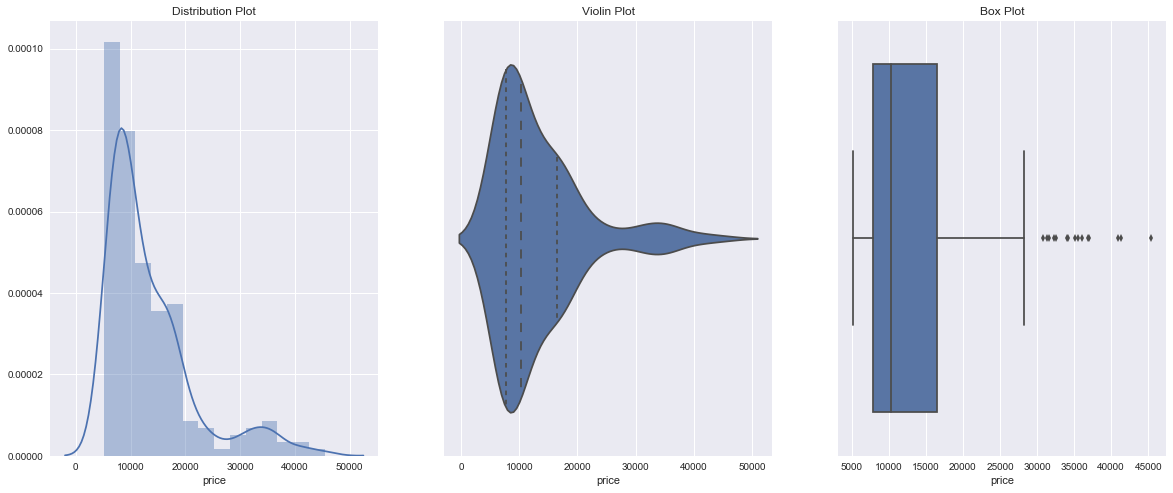

In [82]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
sns.set(style="darkgrid")
ax[0].set_title("Distribution Plot")
sns.distplot(car['price'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(car['price'],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(car['price'],ax=ax[2])
plt.show()

<font color='blue'><b>Insights</b>: Most of the car prices are distributed between 5000 to 15000 USD.</font> 

#### 2. Pie Chart of different categorical variables.

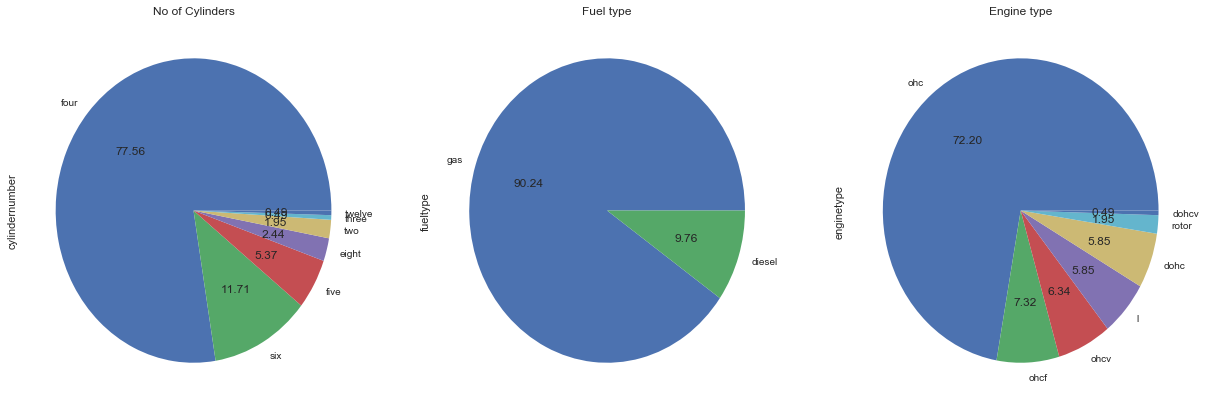

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(21,7))
car['cylindernumber'].value_counts().plot.pie(autopct='%.2f',ax=ax[0])
ax[0].set_title("No of Cylinders")
car['fueltype'].value_counts().plot.pie(autopct='%.2f',ax=ax[1])
ax[1].set_title("Fuel type")
car['enginetype'].value_counts().plot.pie(autopct='%.2f',ax=ax[2])
ax[2].set_title("Engine type")
plt.show()

<font color='blue'><b>Insights::</b></font> 
1. __77%__ of the cars have __four__ cylinders.
2. __90%__ of the cars have __gas__ as a fuel type.
3. __72%__ of the cars have __ohc__ engine type.

### Bivariate/Multivariate Analysis

#### 1. Heatmap :: Correlation between continuos variables.

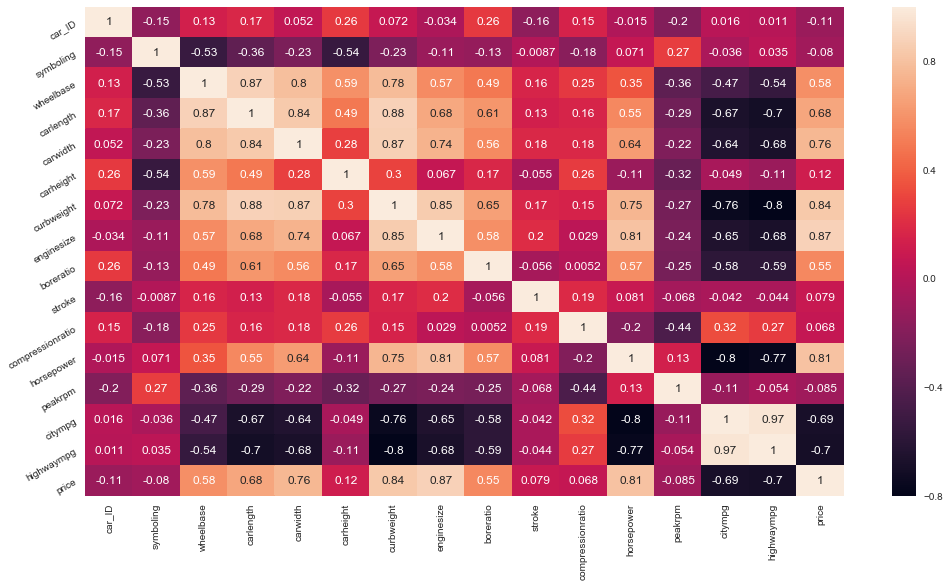

In [84]:
corr = car.corr()
plt.figure(figsize=(17,9))
ax = sns.heatmap(corr, annot=True)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

<font color='blue'><b>Insights</b>: Price is more correlated with engine size, curb weight, horsepower & carwidth of the car</font> 

#### 2. Scatter plot : Engine Size/Curb Weight vs Price

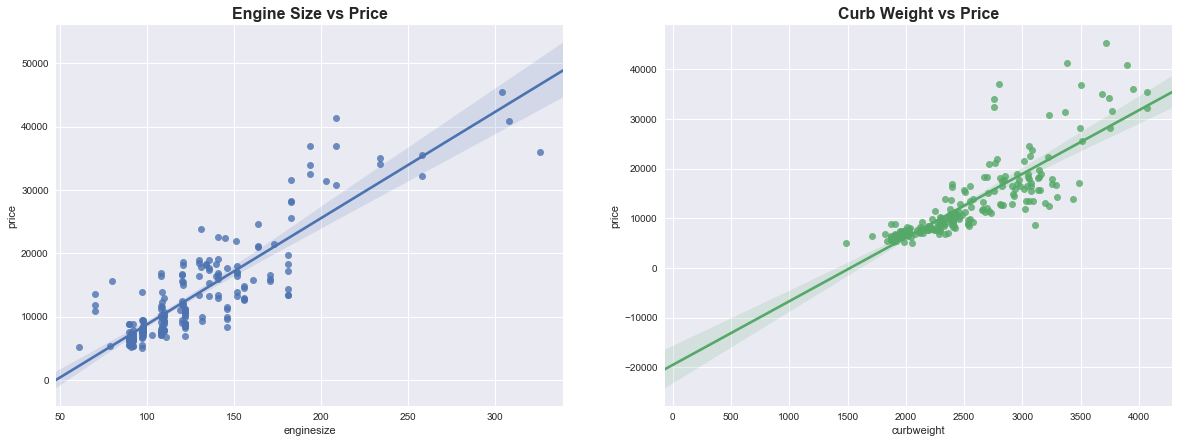

In [85]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,7))
ax[0].set_title('Engine Size vs Price',fontsize=16,weight="bold")
sns.regplot(x='enginesize',y='price', data =car,ax=ax[0])
ax[1].set_title("Curb Weight vs Price",fontsize=16,weight="bold")
sns.regplot(x='curbweight',y='price', data =car,ax=ax[1])
plt.show()

#### 3. Boxplot : Price distribution of different Car companies

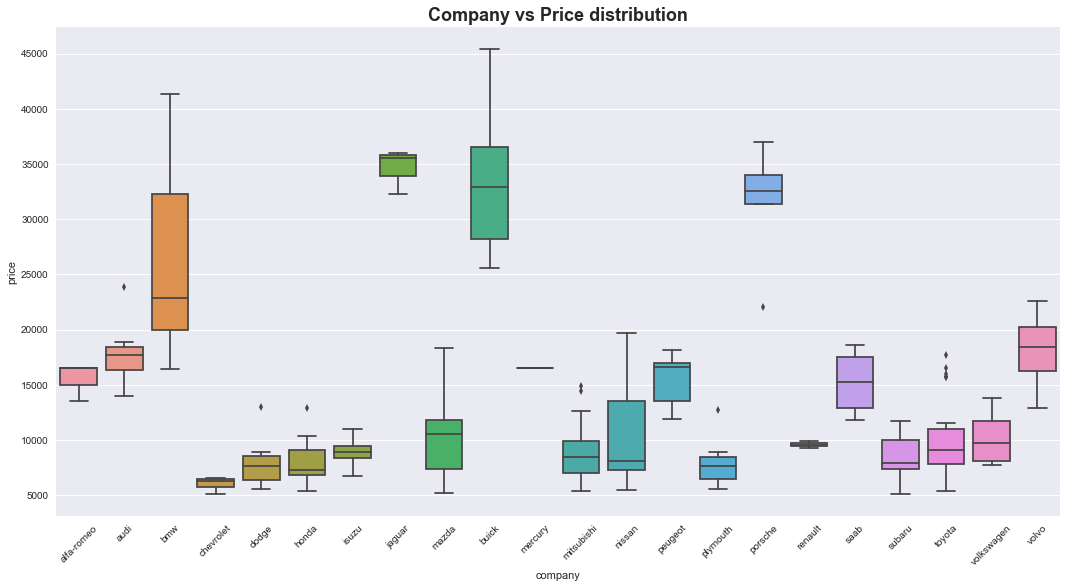

In [86]:
# Price distribution of the cars company-wise
plt.figure(figsize=(18,9))
ax = sns.boxplot(x='company',y='price',data=car)
ax.set_title('Company vs Price distribution',fontsize=18,weight="bold")
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<a id='cat'></a>

## VI. Convert Categorical Variables to Continuos

In [87]:
categorical_cols = car.select_dtypes(include=['object'])
categorical_cols.nunique()

fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
company           22
dtype: int64

In [88]:
# first convert categorical columns where there are only two distinct values to numeric(0 or 1)
car['fueltype'] = car['fueltype'].map({'gas':0, 'diesel':1})
car['aspiration'] = car['aspiration'].map({'std':0, 'turbo':1})
car['doornumber'] = car['doornumber'].map({'two':0, 'four':1})
car['enginelocation'] = car['enginelocation'].map({'front':0, 'rear':1})

In [89]:
car['cylindernumber'] .unique()
# Numeric value of cylindernumber is marked in 'Strings', so we will convert it to number.

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], dtype=object)

In [90]:
car['cylindernumber'] = car['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

__<font color='green'>UDF :: add_dummy(df,colname)</font>__

###### add_dummy(df,colname) function will convert the categorical column to continuos by adding dummy variables to the dataframe and  drop the original categorical column.

In [91]:
def add_dummy(df,colname):
    """
    This function will convert the categorical column to continuos by adding dummy variables to the dataframe and 
    drop the original categorical column.
    df      :: dataframe
    colname :: name of categorical column
    """
    df_new = df.copy()
    dummy = pd.get_dummies(df_new[colname],drop_first=True)
    df_new = pd.concat([df_new,dummy],axis=1)
    df_new.drop(labels=colname,axis=1,inplace=True)
    print(colname,':::',dummy.columns.values,'\n')
    del dummy
    return df_new

In [92]:
car = add_dummy(car,'carbody')
car = add_dummy(car,'drivewheel')
car = add_dummy(car,'enginetype')
car = add_dummy(car,'fuelsystem')
#car = add_dummy(car,'company')

carbody ::: ['hardtop' 'hatchback' 'sedan' 'wagon'] 

drivewheel ::: ['fwd' 'rwd'] 

enginetype ::: ['dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor'] 

fuelsystem ::: ['2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi'] 



In [93]:
print('Count of Car Companies: ',car.company.nunique())

Count of Car Companies:  22


There are 22 different car companies, if we add the dummy variables for this column, we have to add __21 new columns__ which will make the model more __complex__ and  we may end up in __multiple iterations to build the best model.__

So we will make 3 __categories__ of car companies __based on it's price range.__

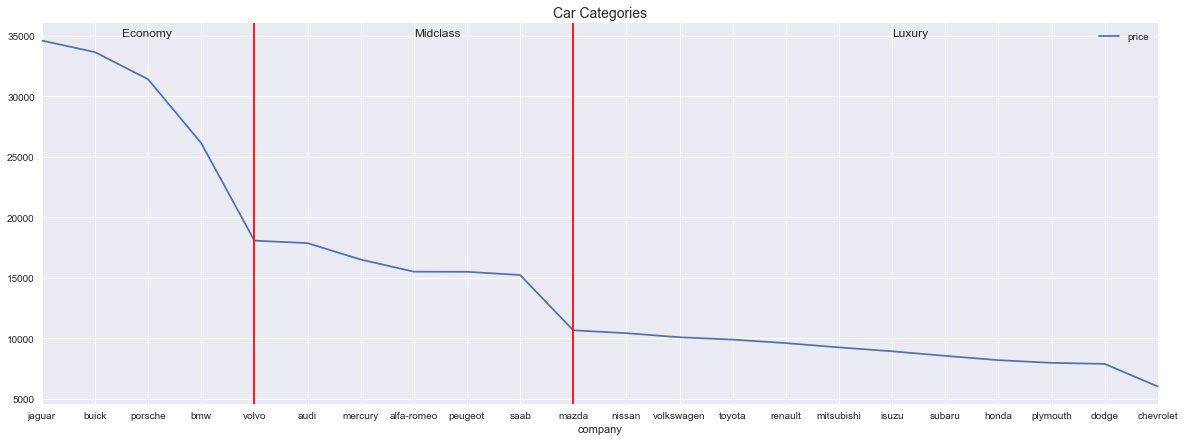

In [94]:
car_class = car.groupby(by='company')['company','price'].mean().sort_values(by='price',ascending=False)

x = range(len(car_class.index))

car_class.plot(xticks=x,figsize=(20,7))
# Add vertical lines
plt.axvline(x=4,color='r')
plt.axvline(x=10,color='r')
# Add Text
plt.text(1.5, 35000,'Economy')
plt.text(7, 35000,'Midclass')
plt.text(16, 35000,'Luxury')
# Title
plt.title('Car Categories',fontsize = 14)
plt.show()

In [95]:
# By looking at the above plot, we can say that all the cars comanies can be divided into three class based on it's price range:
luxury  = ['jaguar','buick','porsche','bmw']
midclass = ['volvo', 'audi', 'mercury','alfa-romero', 'peugeot', 'saab']
economy = ['mazda', 'nissan', 'volkswagen','toyota', 'renault', 'mitsubishi', 'isuzu', 'subaru', 'honda',\
           'plymouth', 'dodge', 'chevrolet']

In [96]:
car['company'].replace(to_replace=luxury,value='luxury',inplace=True)
car['company'].replace(to_replace=midclass,value='midclass',inplace=True)
car['company'].replace(to_replace=economy,value='economy',inplace=True)

In [97]:
car['company'].unique()

array(['alfa-romeo', 'midclass', 'luxury', 'economy'], dtype=object)

In [98]:
# Now add dummy variable for car company(which is now reduced from 20 categories to 3 categories)
car = add_dummy(car,'company')

company ::: ['economy' 'luxury' 'midclass'] 



In [99]:
car.head(3)

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,economy,luxury,midclass
0,1,3,0,0,0,0,88.600,168.800,64.100,48.800,2548,4,130,3.470,2.680,9.000,111,5000,21,27,13495.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,3,0,0,0,0,88.600,168.800,64.100,48.800,2548,4,130,3.470,2.680,9.000,111,5000,21,27,16500.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,94.500,171.200,65.500,52.400,2823,6,152,2.680,3.470,9.000,154,5000,19,26,16500.000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


<a id='scaling'></a>

## VII. Feature Scaling

#### Normalize the data between 0 and 1 using min-max normalization.

In [100]:
car=(car-car.min())/(car.max()-car.min())

In [101]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,economy,luxury,midclass
0,0.000,1.000,0.000,0.000,0.000,0.000,0.058,0.413,0.317,0.083,0.411,0.200,0.260,0.664,0.290,0.125,0.263,0.347,0.222,0.289,0.208,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1,0.005,1.000,0.000,0.000,0.000,0.000,0.058,0.413,0.317,0.083,0.411,0.200,0.260,0.664,0.290,0.125,0.263,0.347,0.222,0.289,0.283,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
2,0.010,0.600,0.000,0.000,0.000,0.000,0.230,0.449,0.433,0.383,0.518,0.400,0.343,0.100,0.667,0.125,0.442,0.347,0.167,0.263,0.283,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
3,0.015,0.800,0.000,0.000,1.000,0.000,0.385,0.530,0.492,0.542,0.329,0.200,0.181,0.464,0.633,0.188,0.225,0.551,0.306,0.368,0.219,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
4,0.020,0.800,0.000,0.000,1.000,0.000,0.373,0.530,0.508,0.542,0.518,0.300,0.283,0.464,0.633,0.062,0.279,0.551,0.139,0.158,0.306,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000


<a id='feature'></a>

## VIII. Feature Selection

In [102]:
# Putting feature variable to X(remove car_ID & price)
X = car.loc[:, ~car.columns.isin(['car_ID','price'])]

# Putting target variable to y
y = car['price']

In [103]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70 , random_state=100)
print('No. of Features: ',X_train.shape[1])

No. of Features:  41


In [104]:
regression = LinearRegression()

#### Using RFE to select top features.

In [105]:
#rank all features
from sklearn.feature_selection import RFE
rfe = RFE(regression, n_features_to_select=18)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank::::\n")
feature_ranking = sorted(list(zip(rfe.ranking_,X_train.columns)))
print(feature_ranking)

Features sorted by their rank::::

[(1, 'boreratio'), (1, 'carwidth'), (1, 'curbweight'), (1, 'cylindernumber'), (1, 'enginelocation'), (1, 'enginesize'), (1, 'hardtop'), (1, 'hatchback'), (1, 'highwaympg'), (1, 'horsepower'), (1, 'luxury'), (1, 'midclass'), (1, 'ohcf'), (1, 'rotor'), (1, 'sedan'), (1, 'stroke'), (1, 'wagon'), (1, 'wheelbase'), (2, 'ohc'), (3, 'idi'), (4, 'fueltype'), (5, 'compressionratio'), (6, 'spdi'), (7, 'carlength'), (8, 'peakrpm'), (9, 'l'), (10, 'fwd'), (11, 'aspiration'), (12, 'carheight'), (13, '2bbl'), (14, 'mpfi'), (15, 'citympg'), (16, 'rwd'), (17, 'dohcv'), (18, 'ohcv'), (19, 'symboling'), (20, '4bbl'), (21, 'economy'), (22, 'doornumber'), (23, 'spfi'), (24, 'mfi')]


#### There are 40 features, we will select top 18 features from it and then mannualy do the backward elimination based on its p-value & VIF.

In [106]:
top_features = X_train.columns[rfe.support_]
X_train = X_train[top_features]
vif_data = car[top_features]
X_test = X_test[top_features]
print('No. of Features after RFE: ',X_train.shape[1])
X_train.head()

No. of Features after RFE:  18


,enginelocation,wheelbase,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,horsepower,highwaympg,hardtop,hatchback,sedan,wagon,ohcf,rotor,luxury,midclass
122,0.000,0.207,0.292,0.273,0.200,0.140,0.307,0.552,0.083,0.579,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
125,0.000,0.230,0.667,0.500,0.200,0.340,1.000,0.495,0.396,0.289,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
166,0.000,0.230,0.308,0.315,0.200,0.140,0.500,0.481,0.267,0.342,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.058,0.317,0.411,0.200,0.260,0.664,0.290,0.263,0.289,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
199,0.000,0.516,0.575,0.647,0.200,0.260,0.771,0.514,0.475,0.158,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000


<a id='model_prep'></a>

### IX. UDF's requied to build the model

In [107]:
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
X_test = sm.add_constant(X_test)

__<font color='green'>UDF :: vif_cal(vif_data)</font>__

###### vif_cal(vif_data) will give the VIF value for each feature which helps us to understand the multicolinearity among different features.

In [108]:
def vif_cal(vif_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=vif_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

Significance(p-value) is more important than multicollinearity(VIF value).
So we will remove those features(one by one) which are having low significance(p-value > significant level).For multicollinearity we will check for VIF value & parallely check for it's p-value , if it is greater than significant level we will remove that column and if p-value < significant level, we will keep that column.

__<font color='green'>UDF :: feature_to_drop(model,SF=0.05,VF=2)</font>__

###### feature_to_drop(model,SF=0.05,VF=2) will drop the column from the features based on it's p-value and VIF value.

In [109]:
def feature_to_drop(model,SF=0.05,VF=2):
    """
    model :: name of the model.
    SF    :: Significance Level, default is 0.05
    VF    :: VIF value, default is 2
    
    """
    pvalue = model.pvalues[model.pvalues >= SF] # SF Value condition
    pvalue = pd.DataFrame(pvalue,columns=['pvalue']).sort_values(by='pvalue',ascending=False)
    if len(pvalue >0):
        if pvalue.index[0] == 'const':
            pvalue = pvalue.drop(pvalue.head(1).index)
    vif = vif_cal(vif_data).set_index('Var')
    matrix =pd.concat([pvalue,vif[vif.index.isin(pvalue.index)]['Vif']],axis=1)
    matrix = matrix[(matrix.Vif >=VF)] # VF value condition
    matrix = matrix.sort_values(by='pvalue',ascending=False)
    if(len(matrix)>0):
        feature = matrix[0:1]
        return feature
    else:
        return 'No feature to drop'

In [110]:
# Create new dataframe model_summary that will contain important information for each model.
model_summary = pd.DataFrame(columns=['Model','No_Features','R-squared','Adj_R-squared','Column_to_Drop','p-value','VIF'])
model_summary = model_summary.set_index('Model')

__<font color='green'>UDF :: add_model_summary(model,name)</font>__

###### add_model_summary(model,name) will add the important information of each model such as p-value, VIF, r-square, no of features,column to drop etc in the model summary table

In [111]:
def add_model_summary(model,name):
    col = feature_to_drop(model)
    if str(type(col)).find('str') == -1:
        model_summary.loc[name] = [X_train.shape[1]-1,model.rsquared,model.rsquared_adj,col.index[0],col.pvalue[0],col.Vif[0]]
    else:
        model_summary.loc[name] = [X_train.shape[1]-1,model.rsquared,model.rsquared_adj,'Nothing to Drop',np.NaN,np.NaN]

<a id='model'></a>

## X. Model Building

#### Model 1

In [112]:
#Let's see the summary of our first linear model
model1 = sm.OLS(y_train,X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           2.72e-68
Time:                        11:42:37   Log-Likelihood:                 237.61
No. Observations:                 143   AIC:                            -437.2
Df Residuals:                     124   BIC:                            -380.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1481      0.062      2.371      0.019       0.024       0.272
enginelocation     0.1458      0.071      2.053      0.042       0.005       0.286
wheelbase          0.0416      0.066      0.632      0.529      -0.089       0.172
carwidth           0.2025      0.061      3.345      0.001       0.083       0.322
curbweight         0.1706      0.087      1.962      0.052      -0.002       0.343
cylindernumber    -0.4601      0.171     -2.696      0.008      -0.798      -0.122
enginesize         0.5438      0.178      3.057      0.003       0.192       0.896
boreratio         -0.2541      0.063     -4.055      0.000      -0.378      -0.130
stroke            -0.1131      0.059     -1.928      0.056      -0.229       0.003
horsepower         0.3349      0.071      4.696      0.000       0.194       0.476
highwaympg         0.0791      0.046      1.713      0.089      -0.012       0.170
hardtop           -0.0829      0.048     -1.737      0.085      -0.177       0.012
hatchback         -0.1118      0.032     -3.446      0.001      -0.176      -0.048
sedan             -0.0908      0.033     -2.753      0.007      -0.156      -0.026
wagon             -0.1087      0.035     -3.125      0.002      -0.178      -0.040
ohcf               0.0299      0.025      1.182      0.240      -0.020       0.080
rotor              0.0803      0.035      2.305      0.023       0.011       0.149
luxury             0.2430      0.021     11.592      0.000       0.201       0.284
midclass           0.0625      0.019      3.215      0.002       0.024       0.101
==============================================================================
Omnibus:                       79.803   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.731
Skew:                           1.837   Prob(JB):                    1.92e-124
Kurtosis:                      12.062   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,5,3,4,2,1,6,7,12,8,9,11,13,17,16,14,10,0,15
Var,enginesize,curbweight,cylindernumber,carwidth,wheelbase,boreratio,stroke,sedan,horsepower,highwaympg,hatchback,wagon,midclass,luxury,ohcf,hardtop,enginelocation,rotor
Vif,67.470,67.330,49.840,48.590,34.310,34.000,30.590,23.030,22.930,19.520,15.330,7.050,3.720,3.080,2.980,2.520,2.370,1.530


In [114]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model1, SF=0.05, VF=2)
drop

,pvalue,Vif
wheelbase,0.529,34.310


In [115]:
# Add key information of this model to model_summary table.
add_model_summary(model = model1, name = 'model1')

#### Model 2

In [116]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model1).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model1).index[0], axis =1)

In [117]:
model2 = sm.OLS(y_train,X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     122.2
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           2.95e-69
Time:                        11:42:38   Log-Likelihood:                 237.38
No. Observations:                 143   AIC:                            -438.8
Df Residuals:                     125   BIC:                            -385.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1490      0.062      2.390      0.018       0.026       0.272
enginelocation     0.1408      0.070      1.999      0.048       0.001       0.280
carwidth           0.2183      0.055      3.973      0.000       0.110       0.327
curbweight         0.1894      0.081      2.324      0.022       0.028       0.351
cylindernumber    -0.4756      0.168     -2.823      0.006      -0.809      -0.142
enginesize         0.5594      0.176      3.183      0.002       0.212       0.907
boreratio         -0.2582      0.062     -4.154      0.000      -0.381      -0.135
stroke            -0.1182      0.058     -2.039      0.044      -0.233      -0.003
horsepower         0.3145      0.063      4.958      0.000       0.189       0.440
highwaympg         0.0744      0.045      1.637      0.104      -0.016       0.164
hardtop           -0.0722      0.045     -1.622      0.107      -0.160       0.016
hatchback         -0.1024      0.029     -3.556      0.001      -0.159      -0.045
sedan             -0.0802      0.028     -2.832      0.005      -0.136      -0.024
wagon             -0.0983      0.031     -3.218      0.002      -0.159      -0.038
ohcf               0.0284      0.025      1.129      0.261      -0.021       0.078
rotor              0.0774      0.034      2.248      0.026       0.009       0.146
luxury             0.2447      0.021     11.807      0.000       0.204       0.286
midclass           0.0650      0.019      3.423      0.001       0.027       0.103
==============================================================================
Omnibus:                       80.921   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              577.503
Skew:                           1.871   Prob(JB):                    3.95e-126
Kurtosis:                      12.106   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,4,2,3,1,5,6,8,7,11,10,12,16,15,13,0,9,14
Var,enginesize,curbweight,cylindernumber,carwidth,boreratio,stroke,highwaympg,horsepower,sedan,hatchback,wagon,midclass,luxury,ohcf,enginelocation,hardtop,rotor
Vif,64.510,61.410,48.480,41.960,33.960,30.280,19.090,18.650,18.530,13.440,5.780,3.570,3.020,2.920,2.370,2.330,1.520


In [119]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model2, SF=0.05, VF=2)
drop

,pvalue,Vif
ohcf,0.261,2.920


In [120]:
# Add key information of this model to model_summary table.
add_model_summary(model = model2, name = 'model2')

#### Model 3

In [121]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model2).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model2).index[0], axis =1)

In [122]:
model3 = sm.OLS(y_train,X_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           4.77e-70
Time:                        11:42:38   Log-Likelihood:                 236.66
No. Observations:                 143   AIC:                            -439.3
Df Residuals:                     126   BIC:                            -388.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1525      0.062      2.447      0.016       0.029       0.276
enginelocation     0.1685      0.066      2.550      0.012       0.038       0.299
carwidth           0.2248      0.055      4.109      0.000       0.117       0.333
curbweight         0.1839      0.081      2.258      0.026       0.023       0.345
cylindernumber    -0.4656      0.168     -2.764      0.007      -0.799      -0.132
enginesize         0.5508      0.176      3.133      0.002       0.203       0.899
boreratio         -0.2344      0.059     -4.005      0.000      -0.350      -0.119
stroke            -0.1421      0.054     -2.631      0.010      -0.249      -0.035
horsepower         0.3006      0.062      4.826      0.000       0.177       0.424
highwaympg         0.0630      0.044      1.420      0.158      -0.025       0.151
hardtop           -0.0678      0.044     -1.527      0.129      -0.156       0.020
hatchback         -0.0947      0.028     -3.381      0.001      -0.150      -0.039
sedan             -0.0718      0.027     -2.625      0.010      -0.126      -0.018
wagon             -0.0898      0.030     -3.031      0.003      -0.148      -0.031
rotor              0.0714      0.034      2.095      0.038       0.004       0.139
luxury             0.2389      0.020     11.887      0.000       0.199       0.279
midclass           0.0562      0.017      3.242      0.002       0.022       0.091
==============================================================================
Omnibus:                       78.797   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.019
Skew:                           1.814   Prob(JB):                    8.19e-121
Kurtosis:                      11.925   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,4,2,3,1,5,6,8,7,11,10,12,15,14,9,0,13
Var,enginesize,curbweight,cylindernumber,carwidth,boreratio,stroke,highwaympg,horsepower,sedan,hatchback,wagon,midclass,luxury,hardtop,enginelocation,rotor
Vif,63.280,61.280,47.190,41.520,24.360,23.710,18.480,18.010,17.630,12.830,5.490,3.050,2.890,2.310,1.760,1.510


In [124]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model3, SF=0.05, VF=2)
drop

,pvalue,Vif
Var,,
highwaympg,0.158,18.480


In [125]:
# Add key information of this model to model_summary table.
add_model_summary(model = model3, name = 'model3')

#### Model 4

In [126]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model3).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model3).index[0], axis =1)

In [127]:
model4 = sm.OLS(y_train,X_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           1.08e-70
Time:                        11:42:39   Log-Likelihood:                 235.52
No. Observations:                 143   AIC:                            -439.0
Df Residuals:                     127   BIC:                            -391.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1810      0.059      3.055      0.003       0.064       0.298
enginelocation     0.1716      0.066      2.587      0.011       0.040       0.303
carwidth           0.2240      0.055      4.080      0.000       0.115       0.333
curbweight         0.1525      0.079      1.938      0.055      -0.003       0.308
cylindernumber    -0.4452      0.168     -2.642      0.009      -0.779      -0.112
enginesize         0.5490      0.176      3.111      0.002       0.200       0.898
boreratio         -0.2291      0.059     -3.906      0.000      -0.345      -0.113
stroke            -0.1333      0.054     -2.475      0.015      -0.240      -0.027
horsepower         0.2640      0.057      4.636      0.000       0.151       0.377
hardtop           -0.0622      0.044     -1.401      0.164      -0.150       0.026
hatchback         -0.0885      0.028     -3.185      0.002      -0.143      -0.034
sedan             -0.0666      0.027     -2.446      0.016      -0.120      -0.013
wagon             -0.0855      0.030     -2.890      0.005      -0.144      -0.027
rotor              0.0613      0.033      1.832      0.069      -0.005       0.127
luxury             0.2413      0.020     12.005      0.000       0.202       0.281
midclass           0.0559      0.017      3.208      0.002       0.021       0.090
==============================================================================
Omnibus:                       80.146   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.805
Skew:                           1.851   Prob(JB):                    5.04e-124
Kurtosis:                      12.033   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,2,4,1,3,5,6,10,7,9,11,14,13,8,0,12
Var,curbweight,enginesize,carwidth,cylindernumber,boreratio,stroke,sedan,horsepower,hatchback,wagon,midclass,luxury,hardtop,enginelocation,rotor
Vif,59.900,55.200,41.500,34.290,19.450,18.520,16.350,13.280,11.600,5.310,3.050,2.890,2.220,1.690,1.490


In [129]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model4, SF=0.05, VF=2)
drop

,pvalue,Vif
hardtop,0.164,2.220


In [130]:
# Add key information of this model to model_summary table.
add_model_summary(model = model4, name = 'model4')

#### Model 5

In [131]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model4).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model4).index[0], axis =1)

In [132]:
model5 = sm.OLS(y_train,X_train).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     145.4
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           2.31e-71
Time:                        11:42:39   Log-Likelihood:                 234.42
No. Observations:                 143   AIC:                            -438.8
Df Residuals:                     128   BIC:                            -394.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1750      0.059      2.951      0.004       0.058       0.292
enginelocation     0.1293      0.059      2.181      0.031       0.012       0.246
carwidth           0.2271      0.055      4.124      0.000       0.118       0.336
curbweight         0.1539      0.079      1.949      0.053      -0.002       0.310
cylindernumber    -0.4787      0.167     -2.859      0.005      -0.810      -0.147
enginesize         0.5807      0.176      3.305      0.001       0.233       0.928
boreratio         -0.2440      0.058     -4.215      0.000      -0.359      -0.129
stroke            -0.1510      0.053     -2.871      0.005      -0.255      -0.047
horsepower         0.2658      0.057      4.651      0.000       0.153       0.379
hatchback         -0.0659      0.023     -2.901      0.004      -0.111      -0.021
sedan             -0.0443      0.022     -1.998      0.048      -0.088      -0.000
wagon             -0.0638      0.025     -2.521      0.013      -0.114      -0.014
rotor              0.0593      0.034      1.769      0.079      -0.007       0.126
luxury             0.2416      0.020     11.972      0.000       0.202       0.281
midclass           0.0551      0.017      3.156      0.002       0.021       0.090
==============================================================================
Omnibus:                       76.496   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              508.608
Skew:                           1.768   Prob(JB):                    3.61e-111
Kurtosis:                      11.536   Cond. No.                         99.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,2,4,1,3,5,6,7,9,8,10,13,12,0,11
Var,curbweight,enginesize,carwidth,cylindernumber,boreratio,stroke,horsepower,sedan,hatchback,wagon,midclass,luxury,enginelocation,rotor
Vif,59.220,54.190,41.170,31.240,16.520,15.490,13.080,10.210,7.450,3.840,3.040,2.890,1.640,1.480


In [134]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model5, SF=0.05, VF=2)
drop

,pvalue,Vif
curbweight,0.053,59.220


In [135]:
# Add key information of this model to model_summary table.
add_model_summary(model = model5, name = 'model5')

#### Model 6

In [136]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model5).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model5).index[0], axis =1)

In [137]:
model6 = sm.OLS(y_train,X_train).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     153.0
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           1.18e-71
Time:                        11:42:40   Log-Likelihood:                 232.33
No. Observations:                 143   AIC:                            -436.7
Df Residuals:                     129   BIC:                            -395.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2178      0.056      3.912      0.000       0.108       0.328
enginelocation     0.1044      0.058      1.785      0.077      -0.011       0.220
carwidth           0.2795      0.049      5.748      0.000       0.183       0.376
cylindernumber    -0.6280      0.150     -4.173      0.000      -0.926      -0.330
enginesize         0.8092      0.132      6.119      0.000       0.548       1.071
boreratio         -0.2785      0.056     -4.997      0.000      -0.389      -0.168
stroke            -0.1778      0.051     -3.466      0.001      -0.279      -0.076
horsepower         0.2937      0.056      5.253      0.000       0.183       0.404
hatchback         -0.0677      0.023     -2.948      0.004      -0.113      -0.022
sedan             -0.0440      0.022     -1.961      0.052      -0.088       0.000
wagon             -0.0484      0.024     -1.993      0.048      -0.096      -0.000
rotor              0.0673      0.034      2.001      0.047       0.001       0.134
luxury             0.2454      0.020     12.094      0.000       0.205       0.286
midclass           0.0685      0.016      4.220      0.000       0.036       0.101
==============================================================================
Omnibus:                       71.666   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.573
Skew:                           1.690   Prob(JB):                     1.15e-89
Kurtosis:                      10.571   Cond. No.                         77.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,3,1,2,4,5,6,8,7,9,11,12,0,10
Var,enginesize,carwidth,cylindernumber,boreratio,stroke,horsepower,sedan,hatchback,wagon,luxury,midclass,enginelocation,rotor
Vif,38.230,33.830,29.690,16.390,15.360,12.500,10.090,7.440,3.420,2.870,2.730,1.600,1.440


In [139]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model6, SF=0.05, VF=2)
drop

,pvalue,Vif
sedan,0.052,10.090


In [140]:
# Add key information of this model to model_summary table.
add_model_summary(model = model6, name = 'model6')

#### Model 7

In [141]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model6).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model6).index[0], axis =1)

In [142]:
model7 = sm.OLS(y_train,X_train).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     161.9
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           5.95e-72
Time:                        11:42:48   Log-Likelihood:                 230.23
No. Observations:                 143   AIC:                            -434.5
Df Residuals:                     130   BIC:                            -395.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1985      0.055      3.584      0.000       0.089       0.308
enginelocation     0.1385      0.056      2.453      0.015       0.027       0.250
carwidth           0.2721      0.049      5.553      0.000       0.175       0.369
cylindernumber    -0.6815      0.150     -4.556      0.000      -0.977      -0.386
enginesize         0.8657      0.130      6.634      0.000       0.608       1.124
boreratio         -0.2916      0.056     -5.214      0.000      -0.402      -0.181
stroke            -0.1980      0.051     -3.898      0.000      -0.299      -0.098
horsepower         0.3001      0.056      5.318      0.000       0.188       0.412
hatchback         -0.0276      0.011     -2.609      0.010      -0.049      -0.007
wagon             -0.0085      0.013     -0.634      0.527      -0.035       0.018
rotor              0.0646      0.034      1.902      0.059      -0.003       0.132
luxury             0.2417      0.020     11.833      0.000       0.201       0.282
midclass           0.0647      0.016      3.972      0.000       0.032       0.097
==============================================================================
Omnibus:                       63.024   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.450
Skew:                           1.520   Prob(JB):                     6.98e-65
Kurtosis:                       9.352   Cond. No.                         72.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,1,3,2,4,6,5,10,11,7,0,9,8
Var,carwidth,enginesize,cylindernumber,boreratio,horsepower,stroke,luxury,midclass,hatchback,enginelocation,rotor,wagon
Vif,33.660,27.770,19.060,13.370,12.400,11.550,2.860,2.640,1.930,1.450,1.420,1.290


In [144]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model7, SF=0.05, VF=2)
drop

'No feature to drop'

In [145]:
# Add key information of this model to model_summary table.
add_model_summary(model = model7, name = 'model7')

***

<a id='model_summary'></a>

## XI. Model Summary

In [146]:
model_summary

,No_Features,R-squared,Adj_R-squared,Column_to_Drop,p-value,VIF
Model,,,,,,
model1,18,0.943,0.935,wheelbase,0.529,34.310
model2,17,0.943,0.936,ohcf,0.261,2.920
model3,16,0.943,0.935,highwaympg,0.158,18.480
model4,15,0.942,0.935,hardtop,0.164,2.220
model5,14,0.941,0.934,curbweight,0.053,59.220
model6,13,0.939,0.933,sedan,0.052,10.090
model7,12,0.937,0.931,Nothing to Drop,nan,nan


In [147]:
# As now there are no features to drop, we will do our prediction on the last model.

<a id='prediction'></a>

## XII. Model Prediction

In [148]:
# Making predictions
X_test = X_test[X_train.columns]
y_pred = model7.predict(X_test)

In [149]:
# computing rmse and r^2
mse = mean_squared_error(y_test,y_pred)
print('MSE\t\t\t:',mse)
print('R-Square on Training\t:',model6.rsquared)
r_square_pred = r2_score(y_test,y_pred)
print('R-Square on Prediction\t:',r_square_pred)

MSE			: 0.00352553635683
R-Square on Training	: 0.939099665199
R-Square on Prediction	: 0.918310032175


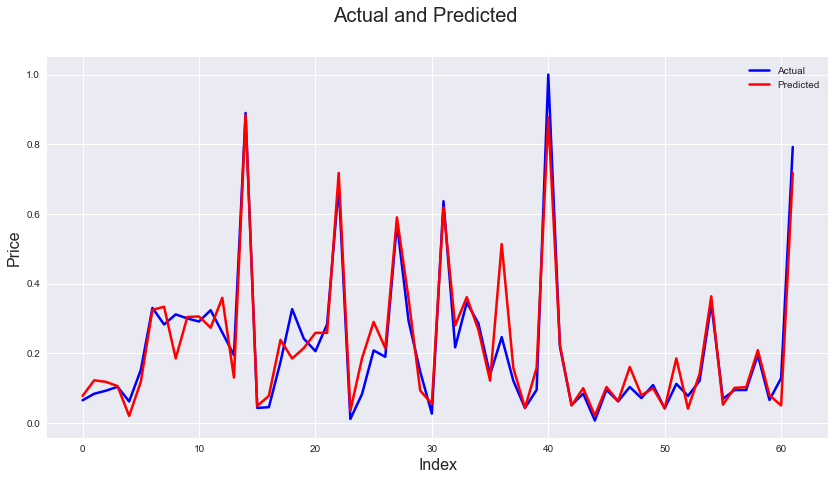

In [150]:
#Actual vs Predicted
c = [i for i in range(0,len(y_pred),1)]
fig = plt.figure(figsize=(14,7))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-",label='Actual')
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-",label='Predicted')
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label
plt.legend()
plt.show()

<font color='blue'><b>Insights</b>: The actual and predicted views significantly overlapped, thus indicating that the model is correctly deriving the features influencing the price.
</font> 

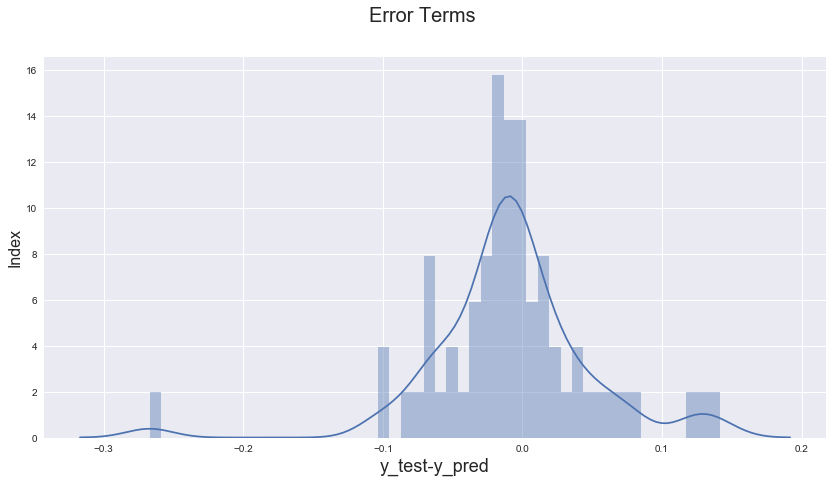

In [151]:
# Plotting the error terms to understand the distribution.
fig = plt.figure(figsize=(14,7))
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

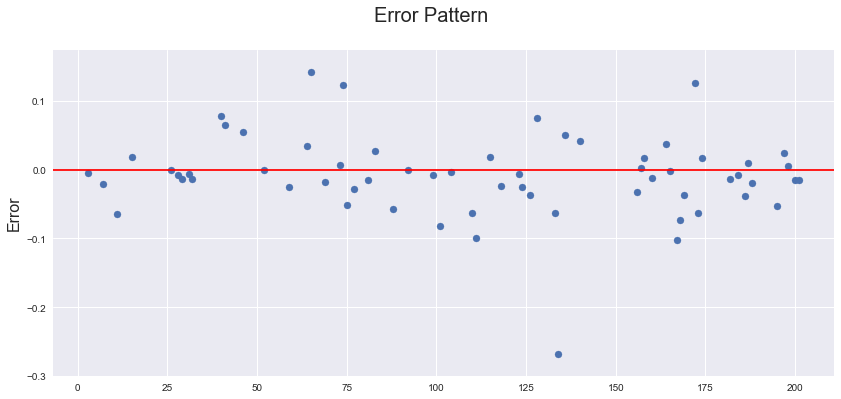

In [152]:
# Check if there is an pattern in Error
fig = plt.figure(figsize=(14,6))
plt.scatter(x=y_test.index, y= (y_test-y_pred))
fig.suptitle('Error Pattern', fontsize=20)                  # Plot heading 
plt.ylabel('Error', fontsize=16)                            # Y-label
plt.axhline(y=0,color='r')                                 # Horizontal Line
plt.show()

<a id='conclusion'></a>

<font color='blue'><b>Insights</b>: Observe that the errors (the differences between the actual values and the values predicted by the model) are randomly distributed. What this essentially confirms is that there are no variables that could have
helped explain the model better.</font> 

## Conclusion

#### Below are the most important features to calculate the price of the Car

In [153]:
final_features = pd.DataFrame(X_train.iloc[:,1:].columns,columns=['final_features']) # removed const
final_features

,final_features
0,enginelocation
1,carwidth
2,cylindernumber
3,enginesize
4,boreratio
5,stroke
6,horsepower
7,hatchback
8,wagon
9,rotor
